# Python for Data Science // S.13 // Classification II // PYTN-KS09
---

## Naive Bayes Classifier Building in Scikit-learn

In [1]:
# Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [3]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
#CombiniNg weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [6]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [7]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [8]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [9]:
# print target shape
wine.target.shape

(178,)

In [10]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [12]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [21]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


## Decision Tree Classifier Building in Scikit-learn

In [23]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv",
                   header=None, names=col_names)

In [25]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [26]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [27]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']
for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [28]:
pima.dropna(inplace=True)

In [29]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable

In [30]:
feature_cols

['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### Visualizing Decision Trees

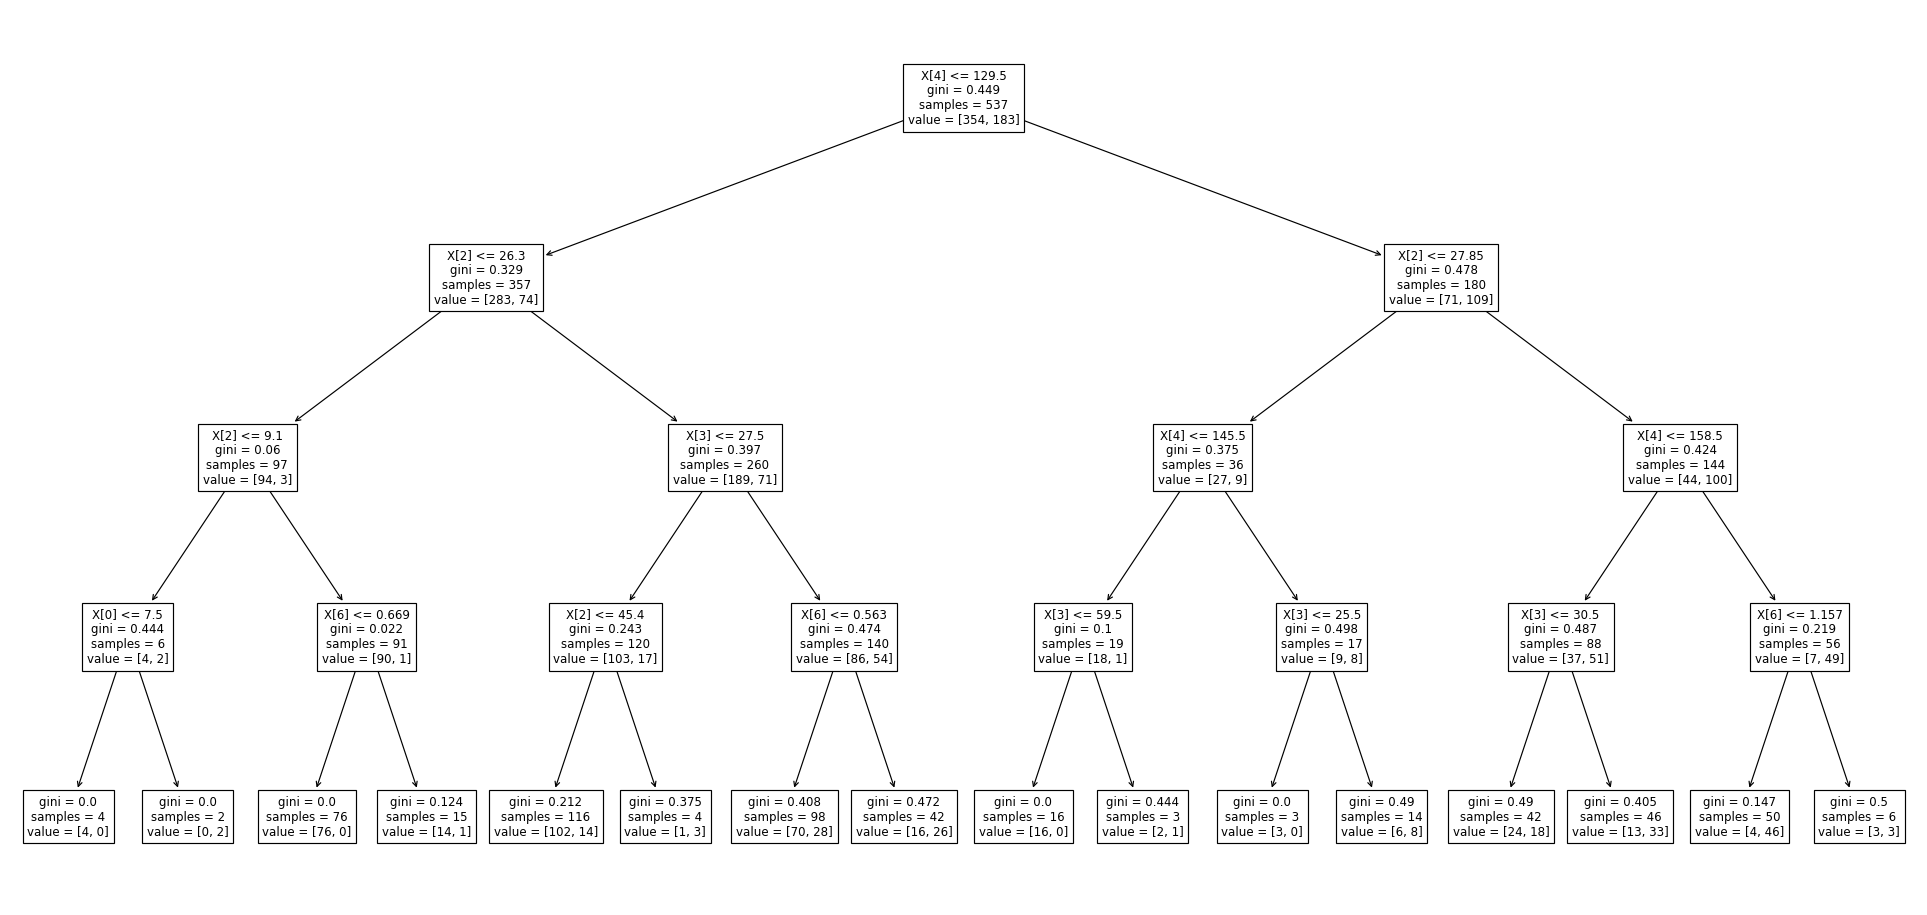

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(29, 14))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


## Building a Classifier using Scikit-learn

In [112]:
# import scikit-learn dataset library
from sklearn.datasets import load_iris

# load dataset
iris = load_iris()

In [113]:
# print the label species(setosa, versicolor, virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [114]:
# print the iris data (top 5 records)
print(f"Top 5 iris data:\n{iris.data[0:5]}\n")

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(f"Iris label: {iris.target_names}")

Top 5 iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Iris label: ['setosa' 'versicolor' 'virginica']


In [115]:
# Creatinf a Dataframe of given iris dataset
import pandas as pd

data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [116]:
data = data[['petal length (cm)', 'petal width (cm)', 
                            'sepal length (cm)', 
                            'sepal width (cm)']]

In [117]:
data['species'] = iris.target

In [118]:
data.head()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


In [119]:
data.columns = ['petal length', 'petal width', 
                'sepal length', 'sepal width', 
                'species']

In [120]:
data

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,2
146,5.0,1.9,6.3,2.5,2
147,5.2,2.0,6.5,3.0,2
148,5.4,2.3,6.2,3.4,2


In [121]:
df_features = data.iloc[:, :4]

In [122]:
df_features.head()

,petal length,petal width,sepal length,sepal width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


In [123]:
df_target = data.iloc[:,4]

In [124]:
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [125]:
X = df_features
y = df_target

In [126]:
# import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [127]:
# import random forest model

from sklearn.ensemble import RandomForestClassifier

# create a gaussian classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# train the model using the training sets
y_pred = clf.predict(X_test)

In [128]:
# import sckit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy: {clf.score(X_test, y_test)}")

Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333


In [129]:
prediction = clf.predict([[3, 5, 4, 2]])
print(prediction)

[2]


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Finding Important Features in Scikit-learn

#### Step 1 : Create a random forests model

In [130]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Train the model using the training sets
y_pred = clf.predict(X_test)

#### Step 2 : Use the feature importance variable to see feature importance scores

In [131]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,
                        index=iris.feature_names).sort_values(ascending=False)

feature_imp

sepal length (cm)    0.458093
sepal width (cm)     0.394252
petal length (cm)    0.117359
petal width (cm)     0.030297
dtype: float64

#### Step 3 : Visualize these scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


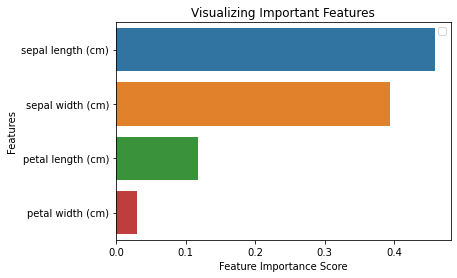

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# creating a bat plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Generating the Model on Selected Features

In [133]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split dataset into features and labels
X = data[['petal length', 'petal width', 'sepal length']]
y = data.loc[:, 'species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state=5)

In [134]:
# import random forest model
from sklearn.ensemble import RandomForestClassifier

# create a gaussian classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9523809523809523


## SVM

In [136]:
# import scikit-learn dataset library 
from sklearn.datasets import load_breast_cancer

# load dataset
cancer = load_breast_cancer()

### Exploring Data

In [139]:
# print the name of the 13 features
print(f"Features : {cancer.feature_names}\n")

# print the label tpye of cancer('malignant', 'benign')
print("Labels: ", cancer.target_names)

Features : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels:  ['malignant' 'benign']


In [140]:
# print data( feature) shape
print(cancer.data.shape)

(569, 30)


In [147]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [146]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [148]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

### Generating Model

In [150]:
# import svm model
from sklearn.svm import SVC

# create a svm classifier
clf = SVC(kernel='linear') #Linear Kernel

# train the model using the training test
clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating the Model

In [151]:
# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# model accuracy: how often is the classifier correct?
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9649122807017544


In [153]:
# import scikit-learn metrics module for calculation
from sklearn.metrics import precision_score, recall_score

# Model precision : what percentage of the positive tuples are labeled as such?
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
                    

Precision: 0.9811320754716981
Recall: 0.9629629629629629


## Exercise: Multiple Algorithm on Dataset

In [154]:
import pandas as pd
import numpy as np

In [160]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [161]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [162]:
print("Train Data:")
print(train.isnull().sum(), "\n")

Train Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [164]:
train = train.fillna(train.mean()) 
train.isnull().sum() 

C:\Users\ACER\AppData\Local\Temp\ipykernel_9452\4079789308.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [165]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [166]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

In [167]:
X=train.drop('Loan_Status', axis = 1)
y=train.Loan_Status

In [168]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [169]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [171]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [174]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [176]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [181]:
train.Loan_Amount_Term

0      5.886104
1      5.886104
2      5.886104
3      5.886104
4      5.886104
         ...   
609    5.886104
610    5.192957
611    5.886104
612    5.886104
613    5.886104
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [178]:
train.shape

(614, 636)

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [199]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [200]:
pred_cv=model.predict(x_cv)

In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8130081300813008
[[13 18]
 [ 5 87]]


In [202]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [203]:
pred_cv1=dt.predict(x_cv)

In [204]:
pred_cv1=dt.predict(x_cv)
print(accuracy_score(y_cv,pred_cv1))
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

0.7642276422764228
[[18 13]
 [16 76]]


In [205]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
pred_cv2=rf.predict(x_cv)

In [207]:
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.8373983739837398
[[13 18]
 [ 2 90]]


In [208]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [209]:
pred_cv3=svm_model.predict(x_cv)

In [210]:
print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.7479674796747967
[[ 0 31]
 [ 0 92]]


In [211]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

pred_cv4=nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.7804878048780488
[[15 16]
 [11 81]]


In [212]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv5=kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

0.6585365853658537
[[14 17]
 [25 67]]


In [213]:
print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4))
print("KNN:", accuracy_score(y_cv,pred_cv5))

Logistic Regression: 0.8130081300813008
Decision Tree: 0.7642276422764228
Random Forest: 0.8373983739837398
SVM: 0.7479674796747967
Naive Bayes: 0.7804878048780488
KNN: 0.6585365853658537


In [214]:
#Write test results in csv file

predictions=pd.DataFrame(pred_cv4, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')